# Algoritmos Metaheurísticos: Práctica 2
Profesor: Dr. Marco Aceves <br>
Alumno: Ing. Enrique Mena Camilo

In [1]:
import sys

import numpy as np

from tqdm import tqdm

sys.path.append("..")

from cities import cities_mapper
from distance_helper import DistanceHelper
from utils.population import init_nobinary_population
from utils.aptitude import evaluate_tsp_population
from utils.selection import roulette_selection, tournament_selection
from utils.crossover import partially_mapped_crossover, cycle_crossover
from utils.mutation import insert_mutation, inverse_mutation
from utils.visualization import plot_aptitude


## Genetic algorithm

In [2]:
def genetic_competence(population: np.ndarray, childrens: np.ndarray, distances, cities_mapper):
    all_population = np.vstack([population, childrens])
    sorted_population, _, _, _ = evaluate_tsp_population(all_population, distances, cities_mapper)
    return sorted_population[:population.shape[0]]


In [3]:
distances = DistanceHelper(offline_mode=True)

genes = 18
generations = 50
max_stagnant_generations = 10
delta = 1000


### Roulette + PMx

Generation:  34%|███▍      | 17/50 [00:01<00:03, 10.38it/s]


Best aptitude: 36557.61000000001
Avg aptitude: 36557.60999999999


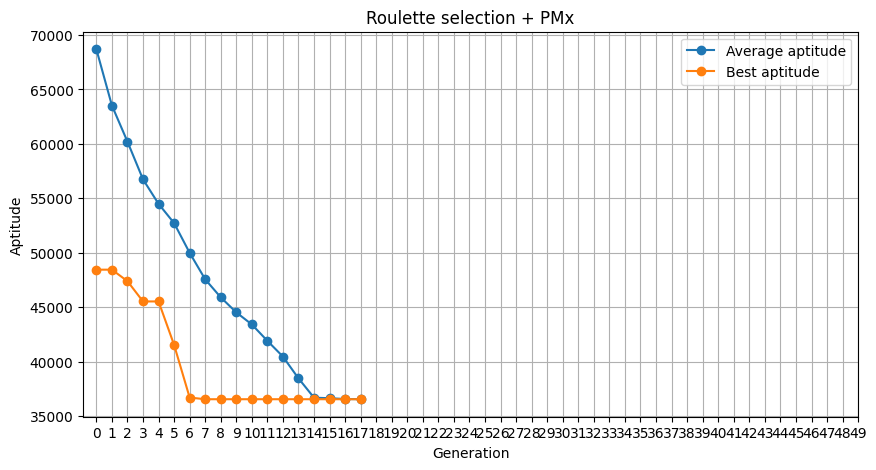

In [4]:
population = init_nobinary_population(n=100, genes=18)
avg_aptitudes_ = []
min_aptitudes_ = []
evolution_ = []
last_best_aptitude = float("inf")
stagnant_generations = 0

for _ in tqdm(range(generations), desc="Generation"):
    population, aptitudes, avg_aptitude, min_aptitude = evaluate_tsp_population(population, distances, cities_mapper)
    avg_aptitudes_.append(avg_aptitude)
    min_aptitudes_.append(min_aptitude)

    if abs(min_aptitude - last_best_aptitude) < delta:
        stagnant_generations += 1
        if stagnant_generations > max_stagnant_generations:
            break
    else:
        stagnant_generations = 0

    last_best_aptitude = min_aptitude
    parents = roulette_selection(aptitudes)
    childrens = partially_mapped_crossover(population, parents)
    childrens = insert_mutation(childrens)
    population = genetic_competence(population, childrens, distances, cities_mapper)

print(f"Best aptitude: {min_aptitudes_[-1]}")
print(f"Avg aptitude: {avg_aptitudes_[-1]}")

title = "Roulette selection + PMx"
plot_aptitude(avg_aptitudes_, min_aptitudes_, generations, title)


### Roulette + Cx

Generation: 100%|██████████| 50/50 [00:12<00:00,  4.02it/s]


Best aptitude: 29746.86
Avg aptitude: 31214.215320000007


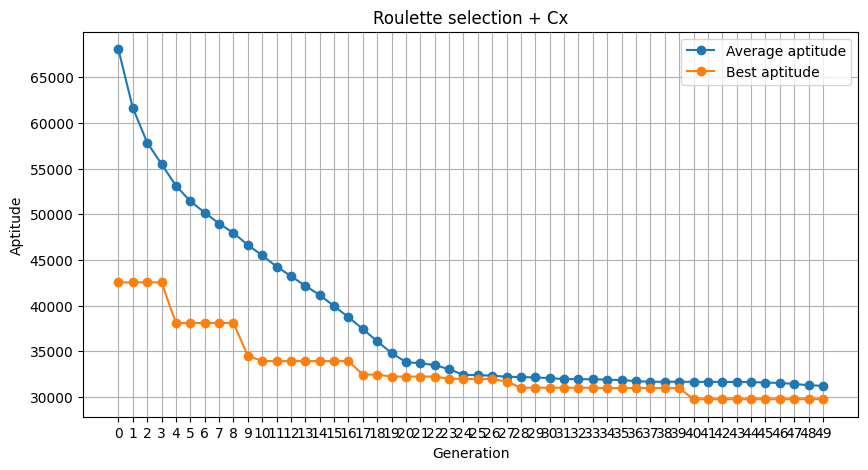

In [5]:
population = init_nobinary_population(n=250, genes=18)
avg_aptitudes_ = []
min_aptitudes_ = []
evolution_ = []
last_best_aptitude = float("inf")
stagnant_generations = 0

for _ in tqdm(range(generations), desc="Generation"):
    population, aptitudes, avg_aptitude, min_aptitude = evaluate_tsp_population(population, distances, cities_mapper)
    avg_aptitudes_.append(avg_aptitude)
    min_aptitudes_.append(min_aptitude)
    evolution_.append(population.copy())

    if abs(min_aptitude - last_best_aptitude) < delta:
        stagnant_generations += 1
        if stagnant_generations > max_stagnant_generations:
            break
    else:
        stagnant_generations = 0

    parents = roulette_selection(aptitudes)
    childrens = cycle_crossover(population, parents)
    childrens = inverse_mutation(childrens)
    population = genetic_competence(population, childrens, distances, cities_mapper)

print(f"Best aptitude: {min_aptitudes_[-1]}")
print(f"Avg aptitude: {avg_aptitudes_[-1]}")

title = "Roulette selection + Cx"
plot_aptitude(avg_aptitudes_, min_aptitudes_, generations, title)
    

### Tournament + PMx

Generation: 100%|██████████| 50/50 [00:21<00:00,  2.35it/s]


Best aptitude: 30304.179999999997
Avg aptitude: 32423.609519999998


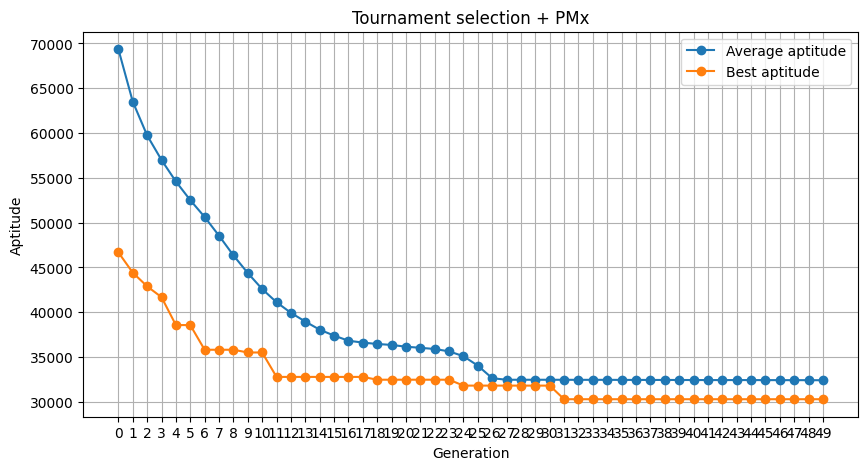

In [6]:
population = init_nobinary_population(n=500, genes=18)
avg_aptitudes_ = []
min_aptitudes_ = []
evolution_ = []
last_best_aptitude = float("inf")
stagnant_generations = 0

for _ in tqdm(range(generations), desc="Generation"):
    population, _, avg_aptitude, min_aptitude = evaluate_tsp_population(population, distances, cities_mapper)
    avg_aptitudes_.append(avg_aptitude)
    min_aptitudes_.append(min_aptitude)
    evolution_.append(population.copy())

    if abs(min_aptitude - last_best_aptitude) < delta:
        stagnant_generations += 1
        if stagnant_generations > max_stagnant_generations:
            break
    else:
        stagnant_generations = 0

    parents = tournament_selection(population)
    childrens = partially_mapped_crossover(population, parents)
    childrens = insert_mutation(childrens)
    population = genetic_competence(population, childrens, distances, cities_mapper)

print(f"Best aptitude: {min_aptitudes_[-1]}")
print(f"Avg aptitude: {avg_aptitudes_[-1]}")

title = "Tournament selection + PMx"
plot_aptitude(avg_aptitudes_, min_aptitudes_, generations, title)
    

### Tournament + Cx

Generation: 100%|██████████| 50/50 [00:42<00:00,  1.17it/s]


Best aptitude: 24571.73
Avg aptitude: 25060.900599999997


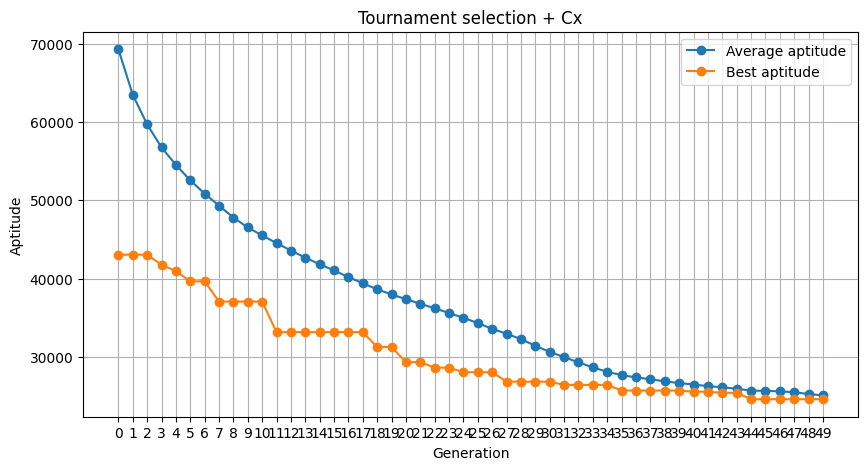

In [7]:
population = init_nobinary_population(n=1000, genes=18)
avg_aptitudes_ = []
min_aptitudes_ = []
evolution_ = []
last_best_aptitude = float("inf")
stagnant_generations = 0

for _ in tqdm(range(generations), desc="Generation"):
    population, _, avg_aptitude, min_aptitude = evaluate_tsp_population(population, distances, cities_mapper)
    avg_aptitudes_.append(avg_aptitude)
    min_aptitudes_.append(min_aptitude)
    evolution_.append(population.copy())

    if abs(min_aptitude - last_best_aptitude) < delta:
        stagnant_generations += 1
        if stagnant_generations > max_stagnant_generations:
            break
    else:
        stagnant_generations = 0

    parents = tournament_selection(population)
    childrens = cycle_crossover(population, parents)
    childrens = inverse_mutation(childrens)
    population = genetic_competence(population, childrens, distances, cities_mapper)

print(f"Best aptitude: {min_aptitudes_[-1]}")
print(f"Avg aptitude: {avg_aptitudes_[-1]}")

title = "Tournament selection + Cx"
plot_aptitude(avg_aptitudes_, min_aptitudes_, generations, title)
